In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!  kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 99% 778M/787M [00:07<00:00, 128MB/s]
100% 787M/787M [00:07<00:00, 106MB/s]


In [5]:
!unzip kaggle-cat-vs-dog-dataset.zip -d /content/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  

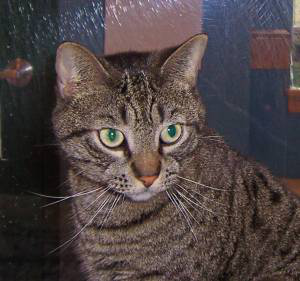

In [6]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
import matplotlib as mpl
import warnings
src_img = Image.open('/content/Dataset/kagglecatsanddogs_3367a/PetImages/Cat/1.jpg')
display(src_img)

In [7]:
# print the size of image 
np.array(src_img).shape

(281, 300, 3)

array([[0.16753412, 0.16614235, 0.19947922, ..., 0.42413255, 0.70356863,
        0.77999098],
       [0.16753412, 0.15157216, 0.19135333, ..., 0.42609686, 0.68704118,
        0.76850118],
       [0.16361255, 0.13980745, 0.16390235, ..., 0.40005961, 0.68872275,
        0.76428902],
       ...,
       [0.08038078, 0.07253765, 0.08038078, ..., 0.22928745, 0.28587882,
        0.23995882],
       [0.09214549, 0.07253765, 0.07645922, ..., 0.18138039, 0.16794902,
        0.13771529],
       [0.10783176, 0.08430235, 0.09214549, ..., 0.26316784, 0.13909922,
        0.1371498 ]])

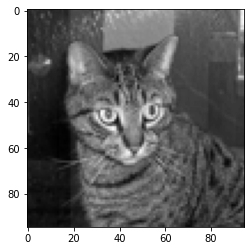

In [8]:
# convert image from rgb to gray scale
img =Image.open('/content/Dataset/kagglecatsanddogs_3367a/PetImages/Cat/1.jpg')
# down size image pixels 
img =img.resize((95,95))
img= np.array(img)
gray_img =rgb2gray(img)
display(gray_img)
plt.imshow(gray_img,cmap=mpl.cm.gray)

[0.         0.         0.         ... 0.05058105 0.08356355 0.12931923]
(9754,)


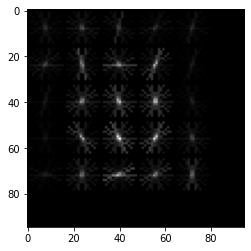

In [9]:
# run HOG using our greyscale bombus image
from skimage.feature import hog
hog_features,hog_image = hog(gray_img,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image,cmap=mpl.cm.gray)
flat_hog=np.array(hog_features).flatten()
hog_image =np.array(hog_image).flatten()
# print(flat_hog)
data_with=np.hstack([hog_image,hog_features])
print(data_with)
print(np.array(data_with).shape)
# print(hog_image)
# print(hog_features)

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
import cv2
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, SpatialDropout2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical


Dir = "/content/Dataset/kagglecatsanddogs_3367a/PetImages"
cts = ["Dog", "Cat"]

data = []
# intialize the object of histograms
hog = cv2.HOGDescriptor()

from skimage.feature import hog

for ct in cts:
    path = os.path.join(Dir, ct)
    for img in os.listdir(path):
        try:        
          img = Image.open(os.path.join(path, img))
          # img = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
          if img is not None:
              img =img.resize((95,95))
              img =np.array(img)
              gray_img =rgb2gray(img)
              # img = cv2.resize(img, (96, 96))
              hog_features,hog_image = hog(gray_img,
                                visualize=True,
                                block_norm='L2-Hys',
                                pixels_per_cell=(16, 16))
              # hog_image=np.array(hog_image).flatten()
              flat_hog=np.array(hog_features).flatten()
              # compine_hog=np.hstack([hog_image,flat_hog])
              data.append([flat_hog, cts.index(ct)])
        except:
          continue;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipp

In [11]:
# print the number of sample 
print(len(data))

24959


In [12]:
# random this dataset 
random.shuffle(data)
features = []
labels  = []
# split the features and lables 
for feature,label in data:
    features.append(feature)
    labels .append(label)

In [13]:
# print the number of training sample 
print(len(features))
print("the shape of features:",np.array(features).shape)
# print the number of testing sample 
print(len(labels))

24959
the shape of features: (24959, 729)
24959


Standard scaling and PCA 

In [193]:
#Scale feature matrix + PCA
from sklearn.preprocessing import StandardScaler
# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
features_standard = ss.fit_transform(features)
pca =PCA(n_components = 0.95)
pca.fit(features_standard)
reduced_features =pca.transform(features_standard)
print(np.array(reduced_features).shape)

(24959, 159)


In [194]:
# splitting data to data train and data for testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.20)
# number of data for training 
x_train = np.array(x_train)
print("the number of sample for training:",len(x_train))
# number of sample data for testing
x_test = np.array(x_test)
print("the number of sample for testing",len(x_test))
# number of sample data for validation training
y_train = np.array(y_train)
print("the number of sample for validation training:",len(y_train))
# number of sample data for validation test
y_test = np.array(y_test)
print("the number of sample for  validation test:",len(y_test))


the number of sample for training: 19967
the number of sample for testing 4992
the number of sample for validation training: 19967
the number of sample for  validation test: 4992


Cross Validation
 

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout
tf.random.set_seed(42)
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))
    # Compile the model
    adam = Adam(lr=learn_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed = 42
learn_rate = [0.001, 0.02, 0.2]
optimizers = ['rmsprop', 'adam', 'SGD']
batch_size = [10, 20, 30]
epochs = [ 20 , 100]
dropout_rate = [0.0, 0.2]
# Make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate,dropout_rate=dropout_rate,batch_size=batch_size, epochs=epochs )
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=KFold(n_splits=2, random_state=1, shuffle=True), verbose=10)

grid_results = grid.fit(x_train[0:1000,:], y_train[0:1000])

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']


Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2; 1/36] START batch_size=10, dropout_rate=0.0, epochs=20, learn_rate=0.001
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 5s 69ms/step - loss: 0.7091 - accuracy: 0.5260
Epoch 2/20
50/50 [==============================] - 3s 69ms/step - loss: 0.6952 - accuracy: 0.5520
Epoch 3/20
50/50 [==============================] - 3s 62ms/step - loss: 0.6563 - accuracy: 0.6220
Epoch 4/20
50/50 [==============================] - 2s 46ms/step - loss: 0.5982 - accuracy: 0.6860
Epoch 5/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6048 - accuracy: 0.6900
Epoch 6/20
50/50 [==============================] - 2s 37ms/step - loss: 0.5734 - accuracy: 0.6700
Epoch 7/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5256 - accuracy: 0.7360
Epoch 8/20
50/50 [==============================] - 2s 39ms/step - loss: 0.5170 - accuracy: 0.7320
Epoch 9/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5717 - accuracy: 0.6980
Epoch 10/20
50/50 [==============================] - 2s 38ms/step - loss: 0.4866 - accuracy: 0.7460
Epoch 11/20
50/50 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 37ms/step - loss: 0.7098 - accuracy: 0.5080
Epoch 2/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6671 - accuracy: 0.6100
Epoch 3/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6807 - accuracy: 0.5320
Epoch 4/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6865 - accuracy: 0.5440
Epoch 5/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6366 - accuracy: 0.6700
Epoch 6/20
50/50 [==============================] - 2s 39ms/step - loss: 0.5688 - accuracy: 0.7340
Epoch 7/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5202 - accuracy: 0.7380
Epoch 8/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5225 - accuracy: 0.7660
Epoch 9/20
50/50 [==============================] - 2s 38ms/step - loss: 0.4572 - accuracy: 0.7800
Epoch 10/20
50/50 [==============================] - 2s 38ms/step - loss: 0.4517 - accuracy: 0.7800
Epoch 11/20
50/50 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 38ms/step - loss: 9.4520 - accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6949 - accuracy: 0.4860
Epoch 3/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 4/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6942 - accuracy: 0.4940
Epoch 5/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6945 - accuracy: 0.5100
Epoch 6/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6944 - accuracy: 0.5100
Epoch 7/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6953 - accuracy: 0.4900
Epoch 8/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6941 - accuracy: 0.5060
Epoch 9/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6951 - accuracy: 0.4740
Epoch 10/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6947 - accuracy: 0.4860
Epoch 11/20
50/50 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 38ms/step - loss: 15.8695 - accuracy: 0.5140
Epoch 2/20
50/50 [==============================] - 2s 38ms/step - loss: 0.7079 - accuracy: 0.5060
Epoch 3/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6951 - accuracy: 0.4820
Epoch 4/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6947 - accuracy: 0.4780
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6936 - accuracy: 0.4780
Epoch 6/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6936 - accuracy: 0.5060
Epoch 7/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6958 - accuracy: 0.5060
Epoch 8/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6947 - accuracy: 0.5140
Epoch 9/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6944 - accuracy: 0.4660
Epoch 10/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6942 - accuracy: 0.4740
Epoch 11/20
50/50 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 36ms/step - loss: 427970.1250 - accuracy: 0.4860
Epoch 2/20
50/50 [==============================] - 2s 36ms/step - loss: 195.7403 - accuracy: 0.5020
Epoch 3/20
50/50 [==============================] - 2s 36ms/step - loss: 0.6946 - accuracy: 0.4820
Epoch 4/20
50/50 [==============================] - 2s 36ms/step - loss: 0.6963 - accuracy: 0.4940
Epoch 5/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6951 - accuracy: 0.5140
Epoch 6/20
50/50 [==============================] - 2s 37ms/step - loss: 0.7011 - accuracy: 0.5240
Epoch 7/20
50/50 [==============================] - 2s 37ms/step - loss: 0.7018 - accuracy: 0.5100
Epoch 8/20
50/50 [==============================] - 2s 36ms/step - loss: 0.7047 - accuracy: 0.4980
Epoch 9/20
50/50 [==============================] - 2s 36ms/step - loss: 0.7003 - accuracy: 0.5100
Epoch 10/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6947 - accuracy: 0.4920
Epoch 11/20
5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 37ms/step - loss: 345222.3438 - accuracy: 0.4780
Epoch 2/20
50/50 [==============================] - 2s 37ms/step - loss: 26.1963 - accuracy: 0.4900
Epoch 3/20
50/50 [==============================] - 2s 37ms/step - loss: 18.8759 - accuracy: 0.4740
Epoch 4/20
50/50 [==============================] - 2s 37ms/step - loss: 11.5845 - accuracy: 0.5140
Epoch 5/20
50/50 [==============================] - 2s 37ms/step - loss: 4.7817 - accuracy: 0.5020
Epoch 6/20
50/50 [==============================] - 2s 37ms/step - loss: 1.6024 - accuracy: 0.4940
Epoch 7/20
50/50 [==============================] - 2s 37ms/step - loss: 2.3166 - accuracy: 0.5460
Epoch 8/20
50/50 [==============================] - 2s 37ms/step - loss: 1.8218 - accuracy: 0.5060
Epoch 9/20
50/50 [==============================] - 2s 37ms/step - loss: 1.5755 - accuracy: 0.4820
Epoch 10/20
50/50 [==============================] - 2s 37ms/step - loss: 1.6942 - accuracy: 0.4940
Epoch 11/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 38ms/step - loss: 0.7115 - accuracy: 0.5140
Epoch 2/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6976 - accuracy: 0.5140
Epoch 3/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6780 - accuracy: 0.5860
Epoch 4/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6065 - accuracy: 0.6780
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5710 - accuracy: 0.7120
Epoch 6/100
50/50 [==============================] - 2s 37ms/step - loss: 0.5902 - accuracy: 0.6780
Epoch 7/100
50/50 [==============================] - 2s 37ms/step - loss: 0.5319 - accuracy: 0.7380
Epoch 8/100
50/50 [==============================] - 2s 37ms/step - loss: 0.5023 - accuracy: 0.7440
Epoch 9/100
50/50 [==============================] - 2s 37ms/step - loss: 0.5214 - accuracy: 0.7620
Epoch 10/100
50/50 [==============================] - 2s 37ms/step - loss: 0.4846 - accuracy: 0.7660
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 37ms/step - loss: 0.7195 - accuracy: 0.5080
Epoch 2/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6865 - accuracy: 0.5940
Epoch 3/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6917 - accuracy: 0.5800
Epoch 4/100
50/50 [==============================] - 2s 36ms/step - loss: 0.6321 - accuracy: 0.6460
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 0.6110 - accuracy: 0.6660
Epoch 6/100
50/50 [==============================] - 2s 37ms/step - loss: 0.5317 - accuracy: 0.7400
Epoch 7/100
50/50 [==============================] - 2s 37ms/step - loss: 0.4982 - accuracy: 0.7400
Epoch 8/100
50/50 [==============================] - 2s 38ms/step - loss: 0.4810 - accuracy: 0.7720
Epoch 9/100
50/50 [==============================] - 2s 38ms/step - loss: 0.4293 - accuracy: 0.7800
Epoch 10/100
50/50 [==============================] - 2s 38ms/step - loss: 0.4311 - accuracy: 0.7880
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 39ms/step - loss: 10.0253 - accuracy: 0.4820
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 0.7156 - accuracy: 0.5180
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 0.8754 - accuracy: 0.4960
Epoch 4/100
50/50 [==============================] - 2s 38ms/step - loss: 0.6985 - accuracy: 0.5580
Epoch 5/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6650 - accuracy: 0.6020
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6467 - accuracy: 0.6260
Epoch 7/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6738 - accuracy: 0.6020
Epoch 8/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6538 - accuracy: 0.5980
Epoch 9/100
50/50 [==============================] - 2s 38ms/step - loss: 0.6886 - accuracy: 0.5840
Epoch 10/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6322 - accuracy: 0.6740
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 39ms/step - loss: 15.3281 - accuracy: 0.5260
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 0.7259 - accuracy: 0.5020
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6940 - accuracy: 0.5060
Epoch 4/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6947 - accuracy: 0.4780
Epoch 5/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6937 - accuracy: 0.4740
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6936 - accuracy: 0.5060
Epoch 7/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6958 - accuracy: 0.5060
Epoch 8/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6947 - accuracy: 0.5180
Epoch 9/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6945 - accuracy: 0.4660
Epoch 10/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6943 - accuracy: 0.4740
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 2s 38ms/step - loss: 409701.7500 - accuracy: 0.5300
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 3593.5940 - accuracy: 0.5020
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 823.3981 - accuracy: 0.4600
Epoch 4/100
50/50 [==============================] - 2s 39ms/step - loss: 39.9302 - accuracy: 0.4680
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 232.5113 - accuracy: 0.5060
Epoch 6/100
50/50 [==============================] - 2s 38ms/step - loss: 71.2887 - accuracy: 0.4840
Epoch 7/100
50/50 [==============================] - 2s 38ms/step - loss: 30.4708 - accuracy: 0.4980
Epoch 8/100
50/50 [==============================] - 2s 38ms/step - loss: 11.8287 - accuracy: 0.5300
Epoch 9/100
50/50 [==============================] - 2s 39ms/step - loss: 4.1157 - accuracy: 0.5260
Epoch 10/100
50/50 [==============================] - 2s 38ms/step - loss: 5.3631 - accuracy: 0.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 39ms/step - loss: 562372.3125 - accuracy: 0.5180
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 2139.5618 - accuracy: 0.4820
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 14626.7627 - accuracy: 0.4960
Epoch 4/100
50/50 [==============================] - 2s 39ms/step - loss: 0.7541 - accuracy: 0.5260
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 0.7316 - accuracy: 0.4740
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6969 - accuracy: 0.4780
Epoch 7/100
50/50 [==============================] - 2s 39ms/step - loss: 0.7083 - accuracy: 0.4980
Epoch 8/100
50/50 [==============================] - 2s 38ms/step - loss: 0.7053 - accuracy: 0.5260
Epoch 9/100
50/50 [==============================] - 2s 39ms/step - loss: 0.7026 - accuracy: 0.4660
Epoch 10/100
50/50 [==============================] - 2s 39ms/step - loss: 0.7057 - accuracy: 0.4820

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 38ms/step - loss: 0.7241 - accuracy: 0.5380
Epoch 2/20
50/50 [==============================] - 2s 39ms/step - loss: 0.7011 - accuracy: 0.5420
Epoch 3/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6888 - accuracy: 0.5860
Epoch 4/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6375 - accuracy: 0.6740
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.5920 - accuracy: 0.7000
Epoch 6/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5858 - accuracy: 0.6860
Epoch 7/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5882 - accuracy: 0.7020
Epoch 8/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5530 - accuracy: 0.7120
Epoch 9/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5696 - accuracy: 0.7140
Epoch 10/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5511 - accuracy: 0.7480
Epoch 11/20
50/50 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 39ms/step - loss: 0.7335 - accuracy: 0.5160
Epoch 2/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6811 - accuracy: 0.5560
Epoch 3/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6654 - accuracy: 0.6160
Epoch 4/20
50/50 [==============================] - 2s 40ms/step - loss: 0.6289 - accuracy: 0.6560
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6124 - accuracy: 0.6560
Epoch 6/20
50/50 [==============================] - 2s 38ms/step - loss: 0.5604 - accuracy: 0.7480
Epoch 7/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6236 - accuracy: 0.6640
Epoch 8/20
50/50 [==============================] - 2s 39ms/step - loss: 0.5099 - accuracy: 0.7520
Epoch 9/20
50/50 [==============================] - 2s 40ms/step - loss: 0.4821 - accuracy: 0.7560
Epoch 10/20
50/50 [==============================] - 2s 40ms/step - loss: 0.4773 - accuracy: 0.7620
Epoch 11/20
50/50 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 40ms/step - loss: 9.4051 - accuracy: 0.4880
Epoch 2/20
50/50 [==============================] - 2s 40ms/step - loss: 0.7075 - accuracy: 0.4720
Epoch 3/20
50/50 [==============================] - 2s 40ms/step - loss: 0.7310 - accuracy: 0.5140
Epoch 4/20
50/50 [==============================] - 2s 40ms/step - loss: 0.6943 - accuracy: 0.4820
Epoch 5/20
50/50 [==============================] - 2s 40ms/step - loss: 0.6946 - accuracy: 0.5100
Epoch 6/20
50/50 [==============================] - 2s 40ms/step - loss: 0.6944 - accuracy: 0.5140
Epoch 7/20
50/50 [==============================] - 2s 40ms/step - loss: 0.6954 - accuracy: 0.4900
Epoch 8/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6941 - accuracy: 0.5060
Epoch 9/20
50/50 [==============================] - 2s 40ms/step - loss: 0.7068 - accuracy: 0.4980
Epoch 10/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6940 - accuracy: 0.4860
Epoch 11/20
50/50 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 37ms/step - loss: 11.5985 - accuracy: 0.4880
Epoch 2/20
50/50 [==============================] - 2s 38ms/step - loss: 0.7240 - accuracy: 0.4560
Epoch 3/20
50/50 [==============================] - 2s 36ms/step - loss: 0.6965 - accuracy: 0.4740
Epoch 4/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6946 - accuracy: 0.4900
Epoch 5/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6938 - accuracy: 0.4720
Epoch 6/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6936 - accuracy: 0.5060
Epoch 7/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6958 - accuracy: 0.5060
Epoch 8/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6947 - accuracy: 0.5140
Epoch 9/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6944 - accuracy: 0.4660
Epoch 10/20
50/50 [==============================] - 2s 43ms/step - loss: 0.6942 - accuracy: 0.4740
Epoch 11/20
50/50 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 39ms/step - loss: 97108.2031 - accuracy: 0.4660
Epoch 2/20
50/50 [==============================] - 2s 39ms/step - loss: 146.5090 - accuracy: 0.4520
Epoch 3/20
50/50 [==============================] - 2s 39ms/step - loss: 158.4213 - accuracy: 0.4740
Epoch 4/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6989 - accuracy: 0.5060
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6947 - accuracy: 0.5200
Epoch 6/20
50/50 [==============================] - 2s 40ms/step - loss: 10.2742 - accuracy: 0.5060
Epoch 7/20
50/50 [==============================] - 2s 40ms/step - loss: 99.4874 - accuracy: 0.5200
Epoch 8/20
50/50 [==============================] - 2s 40ms/step - loss: 0.7082 - accuracy: 0.5100
Epoch 9/20
50/50 [==============================] - 2s 40ms/step - loss: 0.7026 - accuracy: 0.5180
Epoch 10/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6972 - accuracy: 0.4860
Epoch 11/2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 40ms/step - loss: 220163.5938 - accuracy: 0.5480
Epoch 2/20
50/50 [==============================] - 2s 39ms/step - loss: 263.3086 - accuracy: 0.5200
Epoch 3/20
50/50 [==============================] - 2s 39ms/step - loss: 56.8870 - accuracy: 0.4840
Epoch 4/20
50/50 [==============================] - 2s 39ms/step - loss: 26.7841 - accuracy: 0.4340
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 1.0445 - accuracy: 0.4800
Epoch 6/20
50/50 [==============================] - 2s 40ms/step - loss: 16.6646 - accuracy: 0.4680
Epoch 7/20
50/50 [==============================] - 2s 40ms/step - loss: 1915.8361 - accuracy: 0.5100
Epoch 8/20
50/50 [==============================] - 2s 39ms/step - loss: 43.6621 - accuracy: 0.5000
Epoch 9/20
50/50 [==============================] - 2s 38ms/step - loss: 0.9147 - accuracy: 0.4520
Epoch 10/20
50/50 [==============================] - 2s 40ms/step - loss: 4.2233 - accuracy: 0.4760
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 39ms/step - loss: 0.7208 - accuracy: 0.5000
Epoch 2/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6960 - accuracy: 0.5460
Epoch 3/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6832 - accuracy: 0.6060
Epoch 4/100
50/50 [==============================] - 2s 38ms/step - loss: 0.6257 - accuracy: 0.6660
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5963 - accuracy: 0.7000
Epoch 6/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5834 - accuracy: 0.6940
Epoch 7/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5832 - accuracy: 0.6920
Epoch 8/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5614 - accuracy: 0.7020
Epoch 9/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5961 - accuracy: 0.6940
Epoch 10/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5265 - accuracy: 0.7360
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 40ms/step - loss: 0.7269 - accuracy: 0.4820
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6916 - accuracy: 0.5500
Epoch 3/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6761 - accuracy: 0.6000
Epoch 4/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6167 - accuracy: 0.6720
Epoch 5/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6144 - accuracy: 0.6740
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 0.5557 - accuracy: 0.7440
Epoch 7/100
50/50 [==============================] - 2s 40ms/step - loss: 0.5295 - accuracy: 0.7340
Epoch 8/100
50/50 [==============================] - 2s 39ms/step - loss: 0.5080 - accuracy: 0.7560
Epoch 9/100
50/50 [==============================] - 2s 39ms/step - loss: 0.4841 - accuracy: 0.7660
Epoch 10/100
50/50 [==============================] - 2s 39ms/step - loss: 0.4729 - accuracy: 0.7720
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 40ms/step - loss: 10.9639 - accuracy: 0.4800
Epoch 2/100
50/50 [==============================] - 2s 40ms/step - loss: 0.7077 - accuracy: 0.4800
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6938 - accuracy: 0.5060
Epoch 4/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6943 - accuracy: 0.4860
Epoch 5/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6948 - accuracy: 0.5080
Epoch 6/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6946 - accuracy: 0.5120
Epoch 7/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6955 - accuracy: 0.4900
Epoch 8/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6942 - accuracy: 0.5060
Epoch 9/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6963 - accuracy: 0.4900
Epoch 10/100
50/50 [==============================] - 2s 39ms/step - loss: 0.6966 - accuracy: 0.4780
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 41ms/step - loss: 17.6665 - accuracy: 0.5220
Epoch 2/100
50/50 [==============================] - 2s 40ms/step - loss: 0.7491 - accuracy: 0.4840
Epoch 3/100
50/50 [==============================] - 2s 41ms/step - loss: 0.7106 - accuracy: 0.5080
Epoch 4/100
50/50 [==============================] - 2s 40ms/step - loss: 0.6950 - accuracy: 0.5040
Epoch 5/100
50/50 [==============================] - 2s 42ms/step - loss: 0.6937 - accuracy: 0.4840
Epoch 6/100
50/50 [==============================] - 2s 42ms/step - loss: 0.6946 - accuracy: 0.5040
Epoch 7/100
50/50 [==============================] - 2s 41ms/step - loss: 0.6966 - accuracy: 0.4980
Epoch 8/100
50/50 [==============================] - 2s 43ms/step - loss: 0.6972 - accuracy: 0.5180
Epoch 9/100
50/50 [==============================] - 2s 42ms/step - loss: 0.6946 - accuracy: 0.4740
Epoch 10/100
50/50 [==============================] - 2s 42ms/step - loss: 0.6947 - accuracy: 0.4700
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 42ms/step - loss: 119516.7031 - accuracy: 0.5100
Epoch 2/100
50/50 [==============================] - 2s 40ms/step - loss: 224.3405 - accuracy: 0.4960
Epoch 3/100
50/50 [==============================] - 2s 42ms/step - loss: 36.8677 - accuracy: 0.4580
Epoch 4/100
50/50 [==============================] - 2s 41ms/step - loss: 0.7006 - accuracy: 0.5020
Epoch 5/100
50/50 [==============================] - 2s 42ms/step - loss: 0.6963 - accuracy: 0.5260
Epoch 6/100
50/50 [==============================] - 2s 41ms/step - loss: 0.7091 - accuracy: 0.4980
Epoch 7/100
50/50 [==============================] - 2s 40ms/step - loss: 0.7065 - accuracy: 0.5260
Epoch 8/100
50/50 [==============================] - 2s 42ms/step - loss: 0.7089 - accuracy: 0.4780
Epoch 9/100
50/50 [==============================] - 2s 41ms/step - loss: 0.7021 - accuracy: 0.5280
Epoch 10/100
50/50 [==============================] - 2s 43ms/step - loss: 0.6975 - accuracy: 0.4860
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 3s 40ms/step - loss: 177708.6875 - accuracy: 0.5140
Epoch 2/100
50/50 [==============================] - 2s 41ms/step - loss: 1118.8024 - accuracy: 0.4640
Epoch 3/100
50/50 [==============================] - 2s 40ms/step - loss: 4851.8721 - accuracy: 0.4640
Epoch 4/100
50/50 [==============================] - 2s 42ms/step - loss: 1543.7877 - accuracy: 0.4520
Epoch 5/100
50/50 [==============================] - 2s 40ms/step - loss: 0.7136 - accuracy: 0.4820
Epoch 6/100
50/50 [==============================] - 2s 40ms/step - loss: 34.0343 - accuracy: 0.4720
Epoch 7/100
50/50 [==============================] - 2s 40ms/step - loss: 0.7285 - accuracy: 0.4900
Epoch 8/100
50/50 [==============================] - 2s 40ms/step - loss: 0.7116 - accuracy: 0.5220
Epoch 9/100
50/50 [==============================] - 2s 41ms/step - loss: 0.7078 - accuracy: 0.4420
Epoch 10/100
50/50 [==============================] - 2s 41ms/step - loss: 0.7060 - accuracy: 0.4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 43ms/step - loss: 0.7046 - accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6937 - accuracy: 0.4900
Epoch 3/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6704 - accuracy: 0.6300
Epoch 4/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6306 - accuracy: 0.6680
Epoch 5/20
25/25 [==============================] - 1s 42ms/step - loss: 0.5690 - accuracy: 0.7100
Epoch 6/20
25/25 [==============================] - 1s 42ms/step - loss: 0.5474 - accuracy: 0.7080
Epoch 7/20
25/25 [==============================] - 1s 43ms/step - loss: 0.5353 - accuracy: 0.7520
Epoch 8/20
25/25 [==============================] - 1s 42ms/step - loss: 0.5429 - accuracy: 0.7240
Epoch 9/20
25/25 [==============================] - 1s 43ms/step - loss: 0.4960 - accuracy: 0.7400
Epoch 10/20
25/25 [==============================] - 1s 43ms/step - loss: 0.4887 - accuracy: 0.7760
Epoch 11/20
25/25 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 44ms/step - loss: 0.7270 - accuracy: 0.5120
Epoch 2/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6944 - accuracy: 0.4920
Epoch 3/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6699 - accuracy: 0.5780
Epoch 4/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5991 - accuracy: 0.6860
Epoch 5/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5663 - accuracy: 0.6920
Epoch 6/20
25/25 [==============================] - 1s 43ms/step - loss: 0.5049 - accuracy: 0.7480
Epoch 7/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5064 - accuracy: 0.7640
Epoch 8/20
25/25 [==============================] - 1s 43ms/step - loss: 0.4572 - accuracy: 0.7740
Epoch 9/20
25/25 [==============================] - 1s 43ms/step - loss: 0.4502 - accuracy: 0.7780
Epoch 10/20
25/25 [==============================] - 1s 44ms/step - loss: 0.4177 - accuracy: 0.8000
Epoch 11/20
25/25 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
25/25 [==============================] - 2s 42ms/step - loss: 71.8007 - accuracy: 0.5080
Epoch 2/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6909 - accuracy: 0.5160
Epoch 3/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 4/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 5/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 6/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6941 - accuracy: 0.5100
Epoch 7/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6936 - accuracy: 0.4900
Epoch 8/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6937 - accuracy: 0.4940
Epoch 9/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6942 - accuracy: 0.4660
Epoch 10/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 62.4702 - accuracy: 0.4820
Epoch 2/20
25/25 [==============================] - 1s 45ms/step - loss: 0.7161 - accuracy: 0.5100
Epoch 3/20
25/25 [==============================] - 1s 43ms/step - loss: 0.7351 - accuracy: 0.5100
Epoch 4/20
25/25 [==============================] - 1s 43ms/step - loss: 0.7139 - accuracy: 0.4700
Epoch 5/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6951 - accuracy: 0.4840
Epoch 6/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6917 - accuracy: 0.5120
Epoch 7/20
25/25 [==============================] - 1s 43ms/step - loss: 0.7031 - accuracy: 0.5520
Epoch 8/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6603 - accuracy: 0.6200
Epoch 9/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6223 - accuracy: 0.6700
Epoch 10/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6547 - accuracy: 0.6300
Epoch 11/20
25/25 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 43ms/step - loss: 1846715.3750 - accuracy: 0.5300
Epoch 2/20
25/25 [==============================] - 1s 42ms/step - loss: 8275.3750 - accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6993 - accuracy: 0.4980
Epoch 4/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6954 - accuracy: 0.4700
Epoch 5/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6991 - accuracy: 0.4740
Epoch 6/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6947 - accuracy: 0.5180
Epoch 7/20
25/25 [==============================] - 1s 42ms/step - loss: 0.7028 - accuracy: 0.4620
Epoch 8/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6956 - accuracy: 0.5020
Epoch 9/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6992 - accuracy: 0.5060
Epoch 10/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6969 - accuracy: 0.5020
Epoch 11/20

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 44ms/step - loss: 2248106.0000 - accuracy: 0.5280
Epoch 2/20
25/25 [==============================] - 1s 43ms/step - loss: 4104.7227 - accuracy: 0.4820
Epoch 3/20
25/25 [==============================] - 1s 44ms/step - loss: 1237.4152 - accuracy: 0.5360
Epoch 4/20
25/25 [==============================] - 1s 45ms/step - loss: 266.1126 - accuracy: 0.5140
Epoch 5/20
25/25 [==============================] - 1s 44ms/step - loss: 40.2371 - accuracy: 0.5500
Epoch 6/20
25/25 [==============================] - 1s 43ms/step - loss: 7663.0591 - accuracy: 0.5080
Epoch 7/20
25/25 [==============================] - 1s 45ms/step - loss: 5751.1914 - accuracy: 0.5140
Epoch 8/20
25/25 [==============================] - 1s 43ms/step - loss: 245.3167 - accuracy: 0.4940
Epoch 9/20
25/25 [==============================] - 1s 44ms/step - loss: 18.4982 - accuracy: 0.5340
Epoch 10/20
25/25 [==============================] - 1s 43ms/step - loss: 8.8056 - accuracy: 0.5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 44ms/step - loss: 0.7051 - accuracy: 0.4920
Epoch 2/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6934 - accuracy: 0.5080
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6746 - accuracy: 0.6120
Epoch 4/100
25/25 [==============================] - 1s 43ms/step - loss: 0.6309 - accuracy: 0.6680
Epoch 5/100
25/25 [==============================] - 1s 44ms/step - loss: 0.5667 - accuracy: 0.7040
Epoch 6/100
25/25 [==============================] - 1s 44ms/step - loss: 0.5408 - accuracy: 0.7240
Epoch 7/100
25/25 [==============================] - 1s 43ms/step - loss: 0.5257 - accuracy: 0.7500
Epoch 8/100
25/25 [==============================] - 1s 44ms/step - loss: 0.5361 - accuracy: 0.7100
Epoch 9/100
25/25 [==============================] - 1s 44ms/step - loss: 0.4969 - accuracy: 0.7740
Epoch 10/100
25/25 [==============================] - 1s 44ms/step - loss: 0.4403 - accuracy: 0.8000
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 43ms/step - loss: 0.7268 - accuracy: 0.5180
Epoch 2/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6915 - accuracy: 0.5080
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6799 - accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 1s 44ms/step - loss: 0.5993 - accuracy: 0.6800
Epoch 5/100
25/25 [==============================] - 1s 43ms/step - loss: 0.5689 - accuracy: 0.6980
Epoch 6/100
25/25 [==============================] - 1s 44ms/step - loss: 0.4971 - accuracy: 0.7780
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 0.5094 - accuracy: 0.7580
Epoch 8/100
25/25 [==============================] - 1s 43ms/step - loss: 0.4957 - accuracy: 0.7680
Epoch 9/100
25/25 [==============================] - 1s 43ms/step - loss: 0.4583 - accuracy: 0.7820
Epoch 10/100
25/25 [==============================] - 1s 44ms/step - loss: 0.4191 - accuracy: 0.7960
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 44ms/step - loss: 63.5686 - accuracy: 0.5280
Epoch 2/100
25/25 [==============================] - 1s 43ms/step - loss: 0.9118 - accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 1.0174 - accuracy: 0.4780
Epoch 4/100
25/25 [==============================] - 1s 44ms/step - loss: 1.9481 - accuracy: 0.4780
Epoch 5/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6938 - accuracy: 0.5100
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6934 - accuracy: 0.4780
Epoch 8/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6934 - accuracy: 0.5020
Epoch 9/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 10/100
25/25 [==============================] - 1s 43ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 43ms/step - loss: 48.7703 - accuracy: 0.4640
Epoch 2/100
25/25 [==============================] - 1s 43ms/step - loss: 0.6954 - accuracy: 0.5140
Epoch 3/100
25/25 [==============================] - 1s 43ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 4/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 5/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6932 - accuracy: 0.4940
Epoch 6/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6944 - accuracy: 0.4500
Epoch 8/100
25/25 [==============================] - 1s 43ms/step - loss: 0.6947 - accuracy: 0.5060
Epoch 9/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6932 - accuracy: 0.4820
Epoch 10/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6938 - accuracy: 0.4740
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 1820239.2500 - accuracy: 0.4960
Epoch 2/100
25/25 [==============================] - 1s 45ms/step - loss: 14782.8682 - accuracy: 0.5040
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 1670.4604 - accuracy: 0.4960
Epoch 4/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6945 - accuracy: 0.5180
Epoch 5/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6998 - accuracy: 0.4580
Epoch 6/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6942 - accuracy: 0.5180
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 0.7020 - accuracy: 0.4580
Epoch 8/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6954 - accuracy: 0.5020
Epoch 9/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6990 - accuracy: 0.5060
Epoch 10/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6972 - accuracy: 0.494

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 55ms/step - loss: 1511723.6250 - accuracy: 0.5180
Epoch 2/100
25/25 [==============================] - 1s 54ms/step - loss: 15593.4707 - accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 1s 54ms/step - loss: 51041.9375 - accuracy: 0.4860
Epoch 4/100
25/25 [==============================] - 1s 54ms/step - loss: 184.4981 - accuracy: 0.5300
Epoch 5/100
25/25 [==============================] - 1s 51ms/step - loss: 0.7033 - accuracy: 0.4980
Epoch 6/100
25/25 [==============================] - 1s 53ms/step - loss: 0.6938 - accuracy: 0.5100
Epoch 7/100
25/25 [==============================] - 1s 52ms/step - loss: 0.6978 - accuracy: 0.5100
Epoch 8/100
25/25 [==============================] - 1s 55ms/step - loss: 0.6951 - accuracy: 0.5180
Epoch 9/100
25/25 [==============================] - 1s 57ms/step - loss: 0.6976 - accuracy: 0.4900
Epoch 10/100
25/25 [==============================] - 1s 52ms/step - loss: 0.6959 - accuracy: 0.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 46ms/step - loss: 0.7189 - accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6864 - accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6485 - accuracy: 0.6180
Epoch 4/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6020 - accuracy: 0.6820
Epoch 5/20
25/25 [==============================] - 1s 46ms/step - loss: 0.5585 - accuracy: 0.7140
Epoch 6/20
25/25 [==============================] - 1s 47ms/step - loss: 0.5733 - accuracy: 0.6940
Epoch 7/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5604 - accuracy: 0.7220
Epoch 8/20
25/25 [==============================] - 1s 47ms/step - loss: 0.5450 - accuracy: 0.7140
Epoch 9/20
25/25 [==============================] - 1s 46ms/step - loss: 0.5243 - accuracy: 0.7380
Epoch 10/20
25/25 [==============================] - 1s 46ms/step - loss: 0.5086 - accuracy: 0.7620
Epoch 11/20
25/25 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 0.7288 - accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6929 - accuracy: 0.5220
Epoch 3/20
25/25 [==============================] - 1s 47ms/step - loss: 0.6786 - accuracy: 0.5740
Epoch 4/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5928 - accuracy: 0.6800
Epoch 5/20
25/25 [==============================] - 1s 45ms/step - loss: 0.5676 - accuracy: 0.7000
Epoch 6/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5205 - accuracy: 0.7580
Epoch 7/20
25/25 [==============================] - 1s 44ms/step - loss: 0.5635 - accuracy: 0.7240
Epoch 8/20
25/25 [==============================] - 1s 44ms/step - loss: 0.4988 - accuracy: 0.7820
Epoch 9/20
25/25 [==============================] - 1s 47ms/step - loss: 0.4948 - accuracy: 0.7420
Epoch 10/20
25/25 [==============================] - 1s 45ms/step - loss: 0.4832 - accuracy: 0.7480
Epoch 11/20
25/25 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 47ms/step - loss: 49.2612 - accuracy: 0.4780
Epoch 2/20
25/25 [==============================] - 1s 46ms/step - loss: 0.7073 - accuracy: 0.5180
Epoch 3/20
25/25 [==============================] - 1s 46ms/step - loss: 0.7071 - accuracy: 0.4980
Epoch 4/20
25/25 [==============================] - 1s 45ms/step - loss: 0.7439 - accuracy: 0.4840
Epoch 5/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6958 - accuracy: 0.4780
Epoch 6/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6948 - accuracy: 0.5080
Epoch 7/20
25/25 [==============================] - 1s 47ms/step - loss: 0.6936 - accuracy: 0.4900
Epoch 8/20
25/25 [==============================] - 1s 47ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 9/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6942 - accuracy: 0.4660
Epoch 10/20
25/25 [==============================] - 1s 48ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 11/20
25/25 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 21.9780 - accuracy: 0.5360
Epoch 2/20
25/25 [==============================] - 1s 44ms/step - loss: 0.8896 - accuracy: 0.4980
Epoch 3/20
25/25 [==============================] - 1s 45ms/step - loss: 0.7175 - accuracy: 0.4700
Epoch 4/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6986 - accuracy: 0.4720
Epoch 5/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6942 - accuracy: 0.4980
Epoch 6/20
25/25 [==============================] - 1s 45ms/step - loss: 0.7144 - accuracy: 0.5080
Epoch 7/20
25/25 [==============================] - 1s 47ms/step - loss: 0.7089 - accuracy: 0.5020
Epoch 8/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6947 - accuracy: 0.5060
Epoch 9/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6946 - accuracy: 0.4840
Epoch 10/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 11/20
25/25 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 780262.9375 - accuracy: 0.4980
Epoch 2/20
25/25 [==============================] - 1s 44ms/step - loss: 2288.1768 - accuracy: 0.4700
Epoch 3/20
25/25 [==============================] - 1s 44ms/step - loss: 220.1334 - accuracy: 0.4660
Epoch 4/20
25/25 [==============================] - 1s 47ms/step - loss: 78.6173 - accuracy: 0.5260
Epoch 5/20
25/25 [==============================] - 1s 45ms/step - loss: 0.7022 - accuracy: 0.5020
Epoch 6/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6983 - accuracy: 0.4680
Epoch 7/20
25/25 [==============================] - 1s 44ms/step - loss: 0.7081 - accuracy: 0.4640
Epoch 8/20
25/25 [==============================] - 1s 43ms/step - loss: 46.6829 - accuracy: 0.4700
Epoch 9/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6986 - accuracy: 0.5180
Epoch 10/20
25/25 [==============================] - 1s 44ms/step - loss: 442.7478 - accuracy: 0.5000
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 47ms/step - loss: 587144.3750 - accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 1s 47ms/step - loss: 13582.4482 - accuracy: 0.4900
Epoch 3/20
25/25 [==============================] - 1s 45ms/step - loss: 105.5777 - accuracy: 0.4600
Epoch 4/20
25/25 [==============================] - 1s 47ms/step - loss: 259.4881 - accuracy: 0.4720
Epoch 5/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6974 - accuracy: 0.4720
Epoch 6/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6927 - accuracy: 0.4740
Epoch 7/20
25/25 [==============================] - 1s 47ms/step - loss: 134.4928 - accuracy: 0.5120
Epoch 8/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6920 - accuracy: 0.5200
Epoch 9/20
25/25 [==============================] - 1s 47ms/step - loss: 468.6363 - accuracy: 0.4680
Epoch 10/20
25/25 [==============================] - 1s 48ms/step - loss: 0.6956 - accuracy: 0.5060
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 47ms/step - loss: 0.7154 - accuracy: 0.5300
Epoch 2/100
25/25 [==============================] - 1s 47ms/step - loss: 0.6975 - accuracy: 0.5340
Epoch 3/100
25/25 [==============================] - 1s 47ms/step - loss: 0.6616 - accuracy: 0.6140
Epoch 4/100
25/25 [==============================] - 1s 49ms/step - loss: 0.6239 - accuracy: 0.6580
Epoch 5/100
25/25 [==============================] - 1s 49ms/step - loss: 0.5789 - accuracy: 0.7080
Epoch 6/100
25/25 [==============================] - 1s 46ms/step - loss: 0.5809 - accuracy: 0.6740
Epoch 7/100
25/25 [==============================] - 1s 48ms/step - loss: 0.5520 - accuracy: 0.7100
Epoch 8/100
25/25 [==============================] - 1s 50ms/step - loss: 0.6133 - accuracy: 0.6620
Epoch 9/100
25/25 [==============================] - 1s 47ms/step - loss: 0.5242 - accuracy: 0.7320
Epoch 10/100
25/25 [==============================] - 1s 47ms/step - loss: 0.5165 - accuracy: 0.7460
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 0.7430 - accuracy: 0.5140
Epoch 2/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6971 - accuracy: 0.4640
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 0.6748 - accuracy: 0.5980
Epoch 4/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6403 - accuracy: 0.6860
Epoch 5/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6434 - accuracy: 0.6680
Epoch 6/100
25/25 [==============================] - 1s 45ms/step - loss: 0.5344 - accuracy: 0.7520
Epoch 7/100
25/25 [==============================] - 1s 46ms/step - loss: 0.5614 - accuracy: 0.7000
Epoch 8/100
25/25 [==============================] - 1s 45ms/step - loss: 0.5219 - accuracy: 0.7520
Epoch 9/100
25/25 [==============================] - 1s 46ms/step - loss: 0.4892 - accuracy: 0.7740
Epoch 10/100
25/25 [==============================] - 1s 45ms/step - loss: 0.5063 - accuracy: 0.7440
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 39.7454 - accuracy: 0.5080
Epoch 2/100
25/25 [==============================] - 1s 46ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 3/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6939 - accuracy: 0.4900
Epoch 4/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 7/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6937 - accuracy: 0.5060
Epoch 8/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6939 - accuracy: 0.5100
Epoch 9/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6944 - accuracy: 0.4660
Epoch 10/100
25/25 [==============================] - 1s 45ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 48ms/step - loss: 24.9841 - accuracy: 0.5180
Epoch 2/100
25/25 [==============================] - 1s 47ms/step - loss: 0.7135 - accuracy: 0.5080
Epoch 3/100
25/25 [==============================] - 1s 48ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 4/100
25/25 [==============================] - 1s 49ms/step - loss: 0.6934 - accuracy: 0.5060
Epoch 5/100
25/25 [==============================] - 1s 48ms/step - loss: 0.6933 - accuracy: 0.4780
Epoch 6/100
25/25 [==============================] - 1s 49ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 7/100
25/25 [==============================] - 1s 47ms/step - loss: 0.6947 - accuracy: 0.4500
Epoch 8/100
25/25 [==============================] - 1s 48ms/step - loss: 0.6950 - accuracy: 0.5060
Epoch 9/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6933 - accuracy: 0.4940
Epoch 10/100
25/25 [==============================] - 1s 50ms/step - loss: 0.6938 - accuracy: 0.5020
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 49ms/step - loss: 878770.5625 - accuracy: 0.5060
Epoch 2/100
25/25 [==============================] - 1s 50ms/step - loss: 2486.0376 - accuracy: 0.5340
Epoch 3/100
25/25 [==============================] - 1s 48ms/step - loss: 281.9886 - accuracy: 0.5040
Epoch 4/100
25/25 [==============================] - 1s 47ms/step - loss: 218.7565 - accuracy: 0.5080
Epoch 5/100
25/25 [==============================] - 1s 48ms/step - loss: 15.2025 - accuracy: 0.4580
Epoch 6/100
25/25 [==============================] - 1s 46ms/step - loss: 1.2778 - accuracy: 0.5200
Epoch 7/100
25/25 [==============================] - 1s 47ms/step - loss: 39.8945 - accuracy: 0.4880
Epoch 8/100
25/25 [==============================] - 1s 48ms/step - loss: 0.6968 - accuracy: 0.4820
Epoch 9/100
25/25 [==============================] - 1s 46ms/step - loss: 39.0590 - accuracy: 0.5280
Epoch 10/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6954 - accuracy: 0.4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 45ms/step - loss: 820408.0000 - accuracy: 0.4880
Epoch 2/100
25/25 [==============================] - 1s 45ms/step - loss: 2073.5969 - accuracy: 0.5320
Epoch 3/100
25/25 [==============================] - 1s 45ms/step - loss: 54.9543 - accuracy: 0.4560
Epoch 4/100
25/25 [==============================] - 1s 44ms/step - loss: 87.7557 - accuracy: 0.4700
Epoch 5/100
25/25 [==============================] - 1s 44ms/step - loss: 4.3251 - accuracy: 0.4580
Epoch 6/100
25/25 [==============================] - 1s 45ms/step - loss: 40.8888 - accuracy: 0.5020
Epoch 7/100
25/25 [==============================] - 1s 45ms/step - loss: 13.8630 - accuracy: 0.5100
Epoch 8/100
25/25 [==============================] - 1s 43ms/step - loss: 53.3378 - accuracy: 0.5220
Epoch 9/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6982 - accuracy: 0.4740
Epoch 10/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6941 - accuracy: 0.514

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 49ms/step - loss: 0.7185 - accuracy: 0.5060
Epoch 2/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6934 - accuracy: 0.5360
Epoch 3/20
17/17 [==============================] - 1s 51ms/step - loss: 0.6454 - accuracy: 0.6420
Epoch 4/20
17/17 [==============================] - 1s 53ms/step - loss: 0.5969 - accuracy: 0.6920
Epoch 5/20
17/17 [==============================] - 1s 46ms/step - loss: 0.5267 - accuracy: 0.7380
Epoch 6/20
17/17 [==============================] - 1s 52ms/step - loss: 0.5196 - accuracy: 0.7540
Epoch 7/20
17/17 [==============================] - 1s 49ms/step - loss: 0.4940 - accuracy: 0.7960
Epoch 8/20
17/17 [==============================] - 1s 50ms/step - loss: 0.5071 - accuracy: 0.7580
Epoch 9/20
17/17 [==============================] - 1s 51ms/step - loss: 0.4752 - accuracy: 0.8020
Epoch 10/20
17/17 [==============================] - 1s 51ms/step - loss: 0.4544 - accuracy: 0.8180
Epoch 11/20
17/17 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 49ms/step - loss: 0.7136 - accuracy: 0.5160
Epoch 2/20
17/17 [==============================] - 1s 49ms/step - loss: 0.6924 - accuracy: 0.5020
Epoch 3/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6513 - accuracy: 0.5780
Epoch 4/20
17/17 [==============================] - 1s 49ms/step - loss: 0.5871 - accuracy: 0.6880
Epoch 5/20
17/17 [==============================] - 1s 52ms/step - loss: 0.5571 - accuracy: 0.7200
Epoch 6/20
17/17 [==============================] - 1s 52ms/step - loss: 0.5643 - accuracy: 0.6860
Epoch 7/20
17/17 [==============================] - 1s 51ms/step - loss: 0.5281 - accuracy: 0.7420
Epoch 8/20
17/17 [==============================] - 1s 49ms/step - loss: 0.4652 - accuracy: 0.7960
Epoch 9/20
17/17 [==============================] - 1s 48ms/step - loss: 0.4357 - accuracy: 0.7960
Epoch 10/20
17/17 [==============================] - 1s 49ms/step - loss: 0.4201 - accuracy: 0.8120
Epoch 11/20
17/17 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 47ms/step - loss: 241.3947 - accuracy: 0.5260
Epoch 2/20
17/17 [==============================] - 1s 49ms/step - loss: 0.7626 - accuracy: 0.5240
Epoch 3/20
17/17 [==============================] - 1s 49ms/step - loss: 0.6931 - accuracy: 0.5120
Epoch 4/20
17/17 [==============================] - 1s 51ms/step - loss: 0.6866 - accuracy: 0.5480
Epoch 5/20
17/17 [==============================] - 1s 49ms/step - loss: 1.0032 - accuracy: 0.4660
Epoch 6/20
17/17 [==============================] - 1s 49ms/step - loss: 0.7833 - accuracy: 0.4660
Epoch 7/20
17/17 [==============================] - 1s 49ms/step - loss: 0.9056 - accuracy: 0.4900
Epoch 8/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 9/20
17/17 [==============================] - 1s 53ms/step - loss: 0.6937 - accuracy: 0.5100
Epoch 10/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 11/20
17/17 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 52ms/step - loss: 99.8188 - accuracy: 0.5160
Epoch 2/20
17/17 [==============================] - 1s 51ms/step - loss: 0.8294 - accuracy: 0.5140
Epoch 3/20
17/17 [==============================] - 1s 49ms/step - loss: 0.7266 - accuracy: 0.5040
Epoch 4/20
17/17 [==============================] - 1s 51ms/step - loss: 0.7664 - accuracy: 0.4560
Epoch 5/20
17/17 [==============================] - 1s 49ms/step - loss: 0.7327 - accuracy: 0.5140
Epoch 6/20
17/17 [==============================] - 1s 50ms/step - loss: 0.7160 - accuracy: 0.4860
Epoch 7/20
17/17 [==============================] - 1s 51ms/step - loss: 0.6904 - accuracy: 0.5220
Epoch 8/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6712 - accuracy: 0.5840
Epoch 9/20
17/17 [==============================] - 1s 51ms/step - loss: 0.6713 - accuracy: 0.5940
Epoch 10/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6454 - accuracy: 0.6340
Epoch 11/20
17/17 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 51ms/step - loss: 2084608.2500 - accuracy: 0.4960
Epoch 2/20
17/17 [==============================] - 1s 54ms/step - loss: 10291.7158 - accuracy: 0.5120
Epoch 3/20
17/17 [==============================] - 1s 50ms/step - loss: 1739.7648 - accuracy: 0.5120
Epoch 4/20
17/17 [==============================] - 1s 51ms/step - loss: 769.7454 - accuracy: 0.5060
Epoch 5/20
17/17 [==============================] - 1s 53ms/step - loss: 136.3645 - accuracy: 0.5020
Epoch 6/20
17/17 [==============================] - 1s 53ms/step - loss: 0.7228 - accuracy: 0.4740
Epoch 7/20
17/17 [==============================] - 1s 52ms/step - loss: 0.6969 - accuracy: 0.4980
Epoch 8/20
17/17 [==============================] - 1s 50ms/step - loss: 0.6965 - accuracy: 0.4980
Epoch 9/20
17/17 [==============================] - 1s 52ms/step - loss: 0.6982 - accuracy: 0.4580
Epoch 10/20
17/17 [==============================] - 1s 51ms/step - loss: 0.6948 - accuracy: 0.4860
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 54ms/step - loss: 725016.7500 - accuracy: 0.5080
Epoch 2/20
17/17 [==============================] - 1s 52ms/step - loss: 127815.9609 - accuracy: 0.5080
Epoch 3/20
17/17 [==============================] - 1s 51ms/step - loss: 60394.7969 - accuracy: 0.4700
Epoch 4/20
17/17 [==============================] - 1s 52ms/step - loss: 4541.7534 - accuracy: 0.4940
Epoch 5/20
17/17 [==============================] - 1s 55ms/step - loss: 14086.7764 - accuracy: 0.5420
Epoch 6/20
17/17 [==============================] - 1s 53ms/step - loss: 1222.1337 - accuracy: 0.4820
Epoch 7/20
17/17 [==============================] - 1s 52ms/step - loss: 1178.1064 - accuracy: 0.4960
Epoch 8/20
17/17 [==============================] - 1s 55ms/step - loss: 1.8241 - accuracy: 0.4940
Epoch 9/20
17/17 [==============================] - 1s 53ms/step - loss: 0.7114 - accuracy: 0.4820
Epoch 10/20
17/17 [==============================] - 1s 53ms/step - loss: 0.7322 - accuracy: 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 51ms/step - loss: 0.7213 - accuracy: 0.4940
Epoch 2/100
17/17 [==============================] - 1s 51ms/step - loss: 0.6955 - accuracy: 0.5040
Epoch 3/100
17/17 [==============================] - 1s 54ms/step - loss: 0.6622 - accuracy: 0.6320
Epoch 4/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6092 - accuracy: 0.6740
Epoch 5/100
17/17 [==============================] - 1s 52ms/step - loss: 0.5540 - accuracy: 0.7280
Epoch 6/100
17/17 [==============================] - 1s 51ms/step - loss: 0.5621 - accuracy: 0.7060
Epoch 7/100
17/17 [==============================] - 1s 50ms/step - loss: 0.5579 - accuracy: 0.7200
Epoch 8/100
17/17 [==============================] - 1s 52ms/step - loss: 0.5568 - accuracy: 0.7140
Epoch 9/100
17/17 [==============================] - 1s 53ms/step - loss: 0.5078 - accuracy: 0.7500
Epoch 10/100
17/17 [==============================] - 1s 53ms/step - loss: 0.4730 - accuracy: 0.7780
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 50ms/step - loss: 0.7083 - accuracy: 0.5260
Epoch 2/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6863 - accuracy: 0.5140
Epoch 3/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6497 - accuracy: 0.5960
Epoch 4/100
17/17 [==============================] - 1s 52ms/step - loss: 0.5824 - accuracy: 0.6960
Epoch 5/100
17/17 [==============================] - 1s 53ms/step - loss: 0.5613 - accuracy: 0.7100
Epoch 6/100
17/17 [==============================] - 1s 51ms/step - loss: 0.4895 - accuracy: 0.7580
Epoch 7/100
17/17 [==============================] - 1s 48ms/step - loss: 0.4738 - accuracy: 0.7840
Epoch 8/100
17/17 [==============================] - 1s 50ms/step - loss: 0.4476 - accuracy: 0.7960
Epoch 9/100
17/17 [==============================] - 1s 51ms/step - loss: 0.4136 - accuracy: 0.8020
Epoch 10/100
17/17 [==============================] - 1s 50ms/step - loss: 0.4134 - accuracy: 0.8020
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 51ms/step - loss: 137.5065 - accuracy: 0.4940
Epoch 2/100
17/17 [==============================] - 1s 50ms/step - loss: 0.8120 - accuracy: 0.4980
Epoch 3/100
17/17 [==============================] - 1s 50ms/step - loss: 0.7299 - accuracy: 0.4700
Epoch 4/100
17/17 [==============================] - 1s 48ms/step - loss: 0.7023 - accuracy: 0.5100
Epoch 5/100
17/17 [==============================] - 1s 51ms/step - loss: 0.6988 - accuracy: 0.4780
Epoch 6/100
17/17 [==============================] - 1s 51ms/step - loss: 0.6943 - accuracy: 0.5100
Epoch 7/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6939 - accuracy: 0.4880
Epoch 8/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 9/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6929 - accuracy: 0.5220
Epoch 10/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6886 - accuracy: 0.5320
Epoch 11/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 53ms/step - loss: 33.1770 - accuracy: 0.4860
Epoch 2/100
17/17 [==============================] - 1s 54ms/step - loss: 0.8686 - accuracy: 0.5240
Epoch 3/100
17/17 [==============================] - 1s 51ms/step - loss: 0.7458 - accuracy: 0.5160
Epoch 4/100
17/17 [==============================] - 1s 52ms/step - loss: 0.7069 - accuracy: 0.4760
Epoch 5/100
17/17 [==============================] - 1s 53ms/step - loss: 0.7260 - accuracy: 0.4840
Epoch 6/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6983 - accuracy: 0.4980
Epoch 7/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6841 - accuracy: 0.5240
Epoch 8/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6925 - accuracy: 0.5420
Epoch 9/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6851 - accuracy: 0.4940
Epoch 10/100
17/17 [==============================] - 1s 55ms/step - loss: 0.6534 - accuracy: 0.5920
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 53ms/step - loss: 3203991.0000 - accuracy: 0.4740
Epoch 2/100
17/17 [==============================] - 1s 54ms/step - loss: 35395.6562 - accuracy: 0.5240
Epoch 3/100
17/17 [==============================] - 1s 56ms/step - loss: 3296.6968 - accuracy: 0.4920
Epoch 4/100
17/17 [==============================] - 1s 54ms/step - loss: 0.7831 - accuracy: 0.4820
Epoch 5/100
17/17 [==============================] - 1s 52ms/step - loss: 0.7472 - accuracy: 0.5340
Epoch 6/100
17/17 [==============================] - 1s 50ms/step - loss: 0.7318 - accuracy: 0.4880
Epoch 7/100
17/17 [==============================] - 1s 50ms/step - loss: 0.7239 - accuracy: 0.5020
Epoch 8/100
17/17 [==============================] - 1s 53ms/step - loss: 0.7428 - accuracy: 0.4780
Epoch 9/100
17/17 [==============================] - 1s 52ms/step - loss: 0.7301 - accuracy: 0.5140
Epoch 10/100
17/17 [==============================] - 1s 53ms/step - loss: 0.7045 - accuracy: 0.498

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 49ms/step - loss: 417292.1562 - accuracy: 0.5180
Epoch 2/100
17/17 [==============================] - 1s 49ms/step - loss: 35504.1133 - accuracy: 0.4820
Epoch 3/100
17/17 [==============================] - 1s 51ms/step - loss: 38737.3984 - accuracy: 0.4740
Epoch 4/100
17/17 [==============================] - 1s 51ms/step - loss: 14564.7383 - accuracy: 0.4940
Epoch 5/100
17/17 [==============================] - 1s 50ms/step - loss: 0.7245 - accuracy: 0.5060
Epoch 6/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6968 - accuracy: 0.4940
Epoch 7/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6940 - accuracy: 0.5140
Epoch 8/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6957 - accuracy: 0.5100
Epoch 9/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6950 - accuracy: 0.4900
Epoch 10/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6941 - accuracy: 0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 54ms/step - loss: 0.7196 - accuracy: 0.4980
Epoch 2/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6840 - accuracy: 0.5700
Epoch 3/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6427 - accuracy: 0.6540
Epoch 4/20
17/17 [==============================] - 1s 56ms/step - loss: 0.6000 - accuracy: 0.6740
Epoch 5/20
17/17 [==============================] - 1s 55ms/step - loss: 0.5643 - accuracy: 0.7320
Epoch 6/20
17/17 [==============================] - 1s 55ms/step - loss: 0.5694 - accuracy: 0.7080
Epoch 7/20
17/17 [==============================] - 1s 53ms/step - loss: 0.5597 - accuracy: 0.7120
Epoch 8/20
17/17 [==============================] - 1s 54ms/step - loss: 0.5468 - accuracy: 0.7220
Epoch 9/20
17/17 [==============================] - 1s 54ms/step - loss: 0.5486 - accuracy: 0.7380
Epoch 10/20
17/17 [==============================] - 1s 54ms/step - loss: 0.5389 - accuracy: 0.7520
Epoch 11/20
17/17 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 55ms/step - loss: 0.7309 - accuracy: 0.5280
Epoch 2/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6954 - accuracy: 0.5060
Epoch 3/20
17/17 [==============================] - 1s 54ms/step - loss: 0.6513 - accuracy: 0.6360
Epoch 4/20
17/17 [==============================] - 1s 56ms/step - loss: 0.6046 - accuracy: 0.6880
Epoch 5/20
17/17 [==============================] - 1s 55ms/step - loss: 0.5886 - accuracy: 0.6760
Epoch 6/20
17/17 [==============================] - 1s 53ms/step - loss: 0.5283 - accuracy: 0.7320
Epoch 7/20
17/17 [==============================] - 1s 55ms/step - loss: 0.5105 - accuracy: 0.7320
Epoch 8/20
17/17 [==============================] - 1s 56ms/step - loss: 0.5396 - accuracy: 0.7440
Epoch 9/20
17/17 [==============================] - 1s 56ms/step - loss: 0.4916 - accuracy: 0.7820
Epoch 10/20
17/17 [==============================] - 1s 59ms/step - loss: 0.4695 - accuracy: 0.7820
Epoch 11/20
17/17 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 55ms/step - loss: 90.8945 - accuracy: 0.4900
Epoch 2/20
17/17 [==============================] - 1s 56ms/step - loss: 0.7686 - accuracy: 0.5120
Epoch 3/20
17/17 [==============================] - 1s 56ms/step - loss: 0.7002 - accuracy: 0.4840
Epoch 4/20
17/17 [==============================] - 1s 56ms/step - loss: 0.7602 - accuracy: 0.4880
Epoch 5/20
17/17 [==============================] - 1s 56ms/step - loss: 0.7542 - accuracy: 0.4880
Epoch 6/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6936 - accuracy: 0.5120
Epoch 7/20
17/17 [==============================] - 1s 54ms/step - loss: 0.6932 - accuracy: 0.4680
Epoch 8/20
17/17 [==============================] - 1s 53ms/step - loss: 0.6982 - accuracy: 0.4720
Epoch 9/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6942 - accuracy: 0.4580
Epoch 10/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 11/20
17/17 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 54ms/step - loss: 55.1326 - accuracy: 0.5320
Epoch 2/20
17/17 [==============================] - 1s 54ms/step - loss: 0.7089 - accuracy: 0.4980
Epoch 3/20
17/17 [==============================] - 1s 54ms/step - loss: 0.7056 - accuracy: 0.4920
Epoch 4/20
17/17 [==============================] - 1s 53ms/step - loss: 0.7081 - accuracy: 0.5000
Epoch 5/20
17/17 [==============================] - 1s 55ms/step - loss: 0.7111 - accuracy: 0.4860
Epoch 6/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6934 - accuracy: 0.5060
Epoch 7/20
17/17 [==============================] - 1s 54ms/step - loss: 0.6940 - accuracy: 0.5060
Epoch 8/20
17/17 [==============================] - 1s 52ms/step - loss: 0.6940 - accuracy: 0.5060
Epoch 9/20
17/17 [==============================] - 1s 54ms/step - loss: 0.6931 - accuracy: 0.5060
Epoch 10/20
17/17 [==============================] - 1s 54ms/step - loss: 0.6937 - accuracy: 0.4780
Epoch 11/20
17/17 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 55ms/step - loss: 2083055.3750 - accuracy: 0.5260
Epoch 2/20
17/17 [==============================] - 1s 55ms/step - loss: 4751.9590 - accuracy: 0.5220
Epoch 3/20
17/17 [==============================] - 1s 55ms/step - loss: 622.0351 - accuracy: 0.5020
Epoch 4/20
17/17 [==============================] - 1s 54ms/step - loss: 6.9418 - accuracy: 0.5340
Epoch 5/20
17/17 [==============================] - 1s 54ms/step - loss: 18.6583 - accuracy: 0.4980
Epoch 6/20
17/17 [==============================] - 1s 53ms/step - loss: 0.7029 - accuracy: 0.4680
Epoch 7/20
17/17 [==============================] - 1s 55ms/step - loss: 55.5463 - accuracy: 0.4900
Epoch 8/20
17/17 [==============================] - 1s 55ms/step - loss: 0.7227 - accuracy: 0.5060
Epoch 9/20
17/17 [==============================] - 1s 55ms/step - loss: 0.8116 - accuracy: 0.4980
Epoch 10/20
17/17 [==============================] - 1s 56ms/step - loss: 11.4582 - accuracy: 0.4780
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 55ms/step - loss: 693984.3125 - accuracy: 0.5180
Epoch 2/20
17/17 [==============================] - 1s 55ms/step - loss: 3528.3918 - accuracy: 0.5400
Epoch 3/20
17/17 [==============================] - 1s 56ms/step - loss: 444.5736 - accuracy: 0.4880
Epoch 4/20
17/17 [==============================] - 1s 55ms/step - loss: 225.0302 - accuracy: 0.5260
Epoch 5/20
17/17 [==============================] - 1s 54ms/step - loss: 13.1492 - accuracy: 0.4960
Epoch 6/20
17/17 [==============================] - 1s 56ms/step - loss: 159.8585 - accuracy: 0.4980
Epoch 7/20
17/17 [==============================] - 1s 55ms/step - loss: 416.9254 - accuracy: 0.5140
Epoch 8/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6964 - accuracy: 0.5180
Epoch 9/20
17/17 [==============================] - 1s 55ms/step - loss: 0.6992 - accuracy: 0.4780
Epoch 10/20
17/17 [==============================] - 1s 56ms/step - loss: 32.6620 - accuracy: 0.4800
Ep

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 57ms/step - loss: 0.7232 - accuracy: 0.5160
Epoch 2/100
17/17 [==============================] - 1s 58ms/step - loss: 0.6965 - accuracy: 0.5360
Epoch 3/100
17/17 [==============================] - 1s 56ms/step - loss: 0.6741 - accuracy: 0.5900
Epoch 4/100
17/17 [==============================] - 1s 56ms/step - loss: 0.6454 - accuracy: 0.6140
Epoch 5/100
17/17 [==============================] - 1s 56ms/step - loss: 0.5816 - accuracy: 0.7040
Epoch 6/100
17/17 [==============================] - 1s 58ms/step - loss: 0.5753 - accuracy: 0.6900
Epoch 7/100
17/17 [==============================] - 1s 58ms/step - loss: 0.5609 - accuracy: 0.7160
Epoch 8/100
17/17 [==============================] - 1s 57ms/step - loss: 0.5393 - accuracy: 0.7300
Epoch 9/100
17/17 [==============================] - 1s 58ms/step - loss: 0.5509 - accuracy: 0.7240
Epoch 10/100
17/17 [==============================] - 1s 57ms/step - loss: 0.5260 - accuracy: 0.7520
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 55ms/step - loss: 0.7538 - accuracy: 0.4960
Epoch 2/100
17/17 [==============================] - 1s 57ms/step - loss: 0.6900 - accuracy: 0.5320
Epoch 3/100
17/17 [==============================] - 1s 57ms/step - loss: 0.6780 - accuracy: 0.5500
Epoch 4/100
17/17 [==============================] - 1s 57ms/step - loss: 0.6136 - accuracy: 0.6740
Epoch 5/100
17/17 [==============================] - 1s 57ms/step - loss: 0.5889 - accuracy: 0.7000
Epoch 6/100
17/17 [==============================] - 1s 58ms/step - loss: 0.5589 - accuracy: 0.7040
Epoch 7/100
17/17 [==============================] - 1s 57ms/step - loss: 0.5214 - accuracy: 0.7440
Epoch 8/100
17/17 [==============================] - 1s 56ms/step - loss: 0.5380 - accuracy: 0.7460
Epoch 9/100
17/17 [==============================] - 1s 57ms/step - loss: 0.4911 - accuracy: 0.7480
Epoch 10/100
17/17 [==============================] - 1s 58ms/step - loss: 0.4694 - accuracy: 0.7880
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 53ms/step - loss: 97.8131 - accuracy: 0.4960
Epoch 2/100
17/17 [==============================] - 1s 55ms/step - loss: 0.7707 - accuracy: 0.4900
Epoch 3/100
17/17 [==============================] - 1s 55ms/step - loss: 0.7013 - accuracy: 0.5020
Epoch 4/100
17/17 [==============================] - 1s 55ms/step - loss: 0.6937 - accuracy: 0.5100
Epoch 5/100
17/17 [==============================] - 1s 54ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 6/100
17/17 [==============================] - 1s 54ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 7/100
17/17 [==============================] - 1s 55ms/step - loss: 0.6991 - accuracy: 0.5260
Epoch 8/100
17/17 [==============================] - 1s 54ms/step - loss: 0.6952 - accuracy: 0.5100
Epoch 9/100
17/17 [==============================] - 1s 55ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 10/100
17/17 [==============================] - 1s 55ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 51ms/step - loss: 82.9619 - accuracy: 0.4940
Epoch 2/100
17/17 [==============================] - 1s 51ms/step - loss: 0.9878 - accuracy: 0.4640
Epoch 3/100
17/17 [==============================] - 1s 54ms/step - loss: 0.7638 - accuracy: 0.4800
Epoch 4/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6981 - accuracy: 0.5060
Epoch 5/100
17/17 [==============================] - 1s 51ms/step - loss: 0.6982 - accuracy: 0.5320
Epoch 6/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6959 - accuracy: 0.4920
Epoch 7/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6943 - accuracy: 0.4800
Epoch 8/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6945 - accuracy: 0.4960
Epoch 9/100
17/17 [==============================] - 1s 54ms/step - loss: 0.6983 - accuracy: 0.5040
Epoch 10/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6936 - accuracy: 0.4940
Epoch 11/1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 55ms/step - loss: 1797726.0000 - accuracy: 0.5220
Epoch 2/100
17/17 [==============================] - 1s 56ms/step - loss: 8809.6631 - accuracy: 0.5180
Epoch 3/100
17/17 [==============================] - 1s 57ms/step - loss: 1290.2469 - accuracy: 0.5320
Epoch 4/100
17/17 [==============================] - 1s 55ms/step - loss: 88.9782 - accuracy: 0.5220
Epoch 5/100
17/17 [==============================] - 1s 55ms/step - loss: 1.1929 - accuracy: 0.5040
Epoch 6/100
17/17 [==============================] - 1s 57ms/step - loss: 94.1909 - accuracy: 0.4780
Epoch 7/100
17/17 [==============================] - 1s 56ms/step - loss: 5.4030 - accuracy: 0.4960
Epoch 8/100
17/17 [==============================] - 1s 57ms/step - loss: 0.6940 - accuracy: 0.5060
Epoch 9/100
17/17 [==============================] - 1s 56ms/step - loss: 15.0062 - accuracy: 0.5120
Epoch 10/100
17/17 [==============================] - 1s 55ms/step - loss: 4.4437 - accuracy: 0.4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 54ms/step - loss: 417870.6562 - accuracy: 0.5140
Epoch 2/100
17/17 [==============================] - 1s 56ms/step - loss: 5221.4009 - accuracy: 0.4900
Epoch 3/100
17/17 [==============================] - 1s 54ms/step - loss: 1771.9188 - accuracy: 0.4860
Epoch 4/100
17/17 [==============================] - 1s 54ms/step - loss: 175.6284 - accuracy: 0.5020
Epoch 5/100
17/17 [==============================] - 1s 55ms/step - loss: 49.7256 - accuracy: 0.5000
Epoch 6/100
17/17 [==============================] - 1s 56ms/step - loss: 432.8516 - accuracy: 0.4780
Epoch 7/100
17/17 [==============================] - 1s 55ms/step - loss: 11.4651 - accuracy: 0.5200
Epoch 8/100
17/17 [==============================] - 1s 56ms/step - loss: 480.6714 - accuracy: 0.5180
Epoch 9/100
17/17 [==============================] - 1s 56ms/step - loss: 576.7215 - accuracy: 0.4800
Epoch 10/100
17/17 [==============================] - 1s 56ms/step - loss: 0.6937 - accurac

In [28]:
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

0.6590000092983246 (0.011000007390975952) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.001}
0.4919999986886978 (0.001999989151954651) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.02}
0.5019999891519547 (0.008000001311302185) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.2}
0.6680000126361847 (0.006000012159347534) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learn_rate': 0.001}
0.5019999891519547 (0.008000001311302185) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learn_rate': 0.02}
0.49900001287460327 (0.009000003337860107) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learn_rate': 0.2}
0.6520000100135803 (0.009999990463256836) with: {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 20, 'learn_rate': 0.001}
0.4919999986886978 (0.001999989151954651) with: {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 20, 'learn_rate': 0.02}
0.4919999986886978 

In [29]:
best_parameters = grid.best_params_
print(best_parameters)
best_result = grid.best_score_
print(best_result)

{'batch_size': 20, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.001}
0.6759999990463257


In [167]:
tf.random.set_seed(42)
modelANN = tf.keras.Sequential([
    # this is hidden layer
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # this is output layer
    tf.keras.layers.Dense(2, activation='softmax')
])
modelANN.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [168]:
# here we make the training model 
history=modelANN.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size = 20)

Epoch 1/20
999/999 [==============================] - 43s 42ms/step - loss: 0.5952 - accuracy: 0.6830 - val_loss: 0.5525 - val_accuracy: 0.7105
Epoch 2/20
999/999 [==============================] - 42s 42ms/step - loss: 0.5438 - accuracy: 0.7288 - val_loss: 0.5189 - val_accuracy: 0.7416
Epoch 3/20
999/999 [==============================] - 42s 42ms/step - loss: 0.5148 - accuracy: 0.7490 - val_loss: 0.5088 - val_accuracy: 0.7486
Epoch 4/20
999/999 [==============================] - 42s 42ms/step - loss: 0.4927 - accuracy: 0.7615 - val_loss: 0.5183 - val_accuracy: 0.7410
Epoch 5/20
999/999 [==============================] - 42s 42ms/step - loss: 0.4767 - accuracy: 0.7743 - val_loss: 0.5000 - val_accuracy: 0.7588
Epoch 6/20
999/999 [==============================] - 42s 42ms/step - loss: 0.4585 - accuracy: 0.7809 - val_loss: 0.5002 - val_accuracy: 0.7574
Epoch 7/20
999/999 [==============================] - 42s 42ms/step - loss: 0.4469 - accuracy: 0.7921 - val_loss: 0.5053 - val_accuracy:

In [169]:
print(modelANN.evaluate(x_test,y_test))

156/156 [==============================] - 2s 12ms/step - loss: 0.6343 - accuracy: 0.7582
[0.634326696395874, 0.7582131624221802]


In [170]:
modelANN.summary()

Model: "sequential_260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1299 (Dense)          (None, 2048)              1495040   
                                                                 
 dense_1300 (Dense)          (None, 1024)              2098176   
                                                                 
 dense_1301 (Dense)          (None, 1024)              1049600   
                                                                 
 dense_1302 (Dense)          (None, 128)               131200    
                                                                 
 dense_1303 (Dense)          (None, 2)                 258       
                                                                 
Total params: 4,774,274
Trainable params: 4,774,274
Non-trainable params: 0
_________________________________________________________________


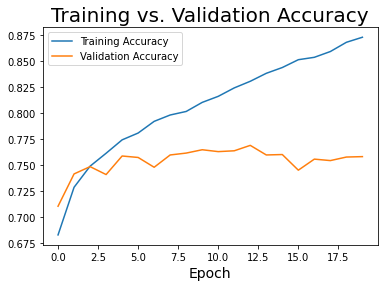

In [171]:
plt.plot( history.history['accuracy'], label='Training Accuracy')
plt.plot( history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

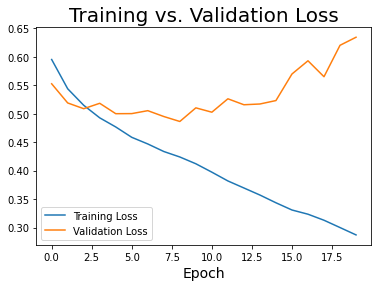

In [172]:

plt.plot( history.history['loss'], label='Training Loss')
plt.plot( history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

Consider rewriting this model with the Functional API.
[[2095  395]
 [ 812 1690]]


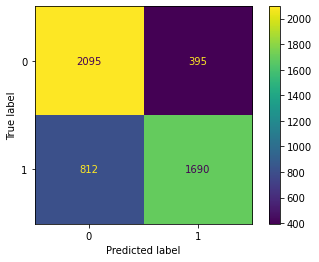

In [173]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

predict_prob=modelANN.predict([x_test,y_test])
predict_classes=np.argmax(predict_prob,axis=1)
cm=metrics.confusion_matrix(y_test,predict_classes)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [174]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
y_pred = modelANN.predict(x_test, batch_size=20, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

250/250 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      2490
           1       0.81      0.68      0.74      2502

    accuracy                           0.76      4992
   macro avg       0.77      0.76      0.76      4992
weighted avg       0.77      0.76      0.76      4992



[0 1 1 ... 0 0 1]


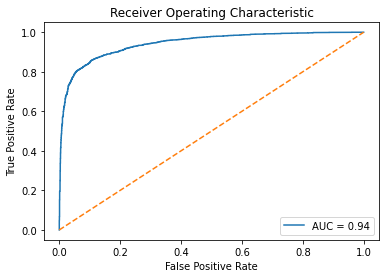

In [197]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_keras = modelANN.predict(x_test)
print(y_test)
# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_keras[:,1])

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

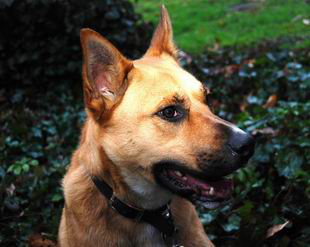

1/1 [==============================] - 0s 35ms/step
[[0.5310176  0.46898246]]
this is Dog


In [ ]:
from skimage.feature import hog
src_img = Image.open('/content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/251.jpg')
display(src_img)
gray_img = ImageOps.grayscale(src_img)
gray_resized_img = gray_img.resize(size=(96, 96))
hog_features, hog_image = hog(gray_resized_img,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))
Test_img =[]
hog_features=np.array(hog_image).flatten()
Test_img.append(hog_features)
Test_img =np.array(Test_img)
y_pred = model.predict(Test_img, batch_size=64, verbose=1)
print(y_pred)

for i in range(len(y_pred[0]):
  if y_pred[0][i]>.5:
    print("this is Dog")
  else:
    print("this is Cat");
